## 1. Using the API

Recall the **big picture**. If we are targeting for specific data we could check if the web site has a programatic interface for querying. If it has we can use it.



<img style="border-radius:20px;" src="./files/big_picture.jpg">

## Scrapping twitter data with the API

A standard way for programatically communicating with a web service is using the API (Application Programing Interface) whenever it is provided. Twitter provides several APIs. The two most important ones are the RESTful API for static queries (e.g. user's friends and followers, check timelines, etc) and the Streaming API for retrieving live data. The REST API identifies Twitter applications and users using OAuth; responses are available in JSON. The Streaming API should not need authentication.

Ex. 

https://api.twitter.com/oauth/authenticate?oauth_token=XXXXXXXXXXXXXX

https://api.twitter.com/1.1/followers/ids.json?cursor=-1&screen_name=my_user_name&count=5000

Building these queries is not always easy, thus we may use a wrapper around the API. This is what **tweepy** does.

Using the API with authentification (needed for the RESTful API)

From wikipedia:

>"Web service APIs that adhere to the architectural constraints are called RESTful. HTTP based RESTful APIs are defined with these aspects:

> <ul><li>base URI, such as http://example.com/resources/
<li>an Internet media type for the data. This is often JSON but can be any other valid Internet media type (e.g. XML, Atom, microformats, images, etc.)</li>
<li>standard HTTP methods (e.g., GET, PUT, POST, or DELETE)</li>
<li>hypertext links to reference state</li>
<li>hypertext links to reference related resources"</li>
</ul>

If we want to use the RESTful API in Twitter we have to follow these steps:
<ul>
<li>From your twitter account we want to generate a token: https://developer.twitter.com/en/apps</li>
<li>Create a new App. This will create the API keys (consumer keys)</li>
<li>Go to API Keys and generate a token. (access keys)</li>
<li> Write them down in files **consumer_key**, **consumer_secret**, **access_key**, **access_secret**
<li> Check Tweepy API reference: http://docs.tweepy.org/en/v3.5.0/api.html
</ul>

In [1]:
import json
import pymongo
import tweepy

with open('consumer_key', 'r') as f:
    consumer_key =  f.read()
f.closed

with open('consumer_secret', 'r') as f:
    consumer_secret = f.read()
f.closed

with open('access_key', 'r') as f:
    access_key = f.read()
f.closed

with open('access_secret', 'r') as f:
     access_secret = f.read()
f.closed


#Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)


#Do something
USER_NAME = "eloipuertas"
user = api.get_user(id=USER_NAME)
print (user)

User(_api=<tweepy.api.API object at 0x10d50c2b0>, _json={'id': 484683149, 'id_str': '484683149', 'name': 'Eloi Puertas Prats', 'screen_name': 'eloipuertas', 'location': 'Univeristat de Barcelona', 'profile_location': None, 'description': 'Distributed Software and Agile Data Science teacher. Director of Studies Eng. Informàtica. UB. DatabeersBCN co-founder.', 'url': 'https://t.co/hbfA0tesFa', 'entities': {'url': {'urls': [{'url': 'https://t.co/hbfA0tesFa', 'expanded_url': 'http://ub-gei-sd.github.io/', 'display_url': 'ub-gei-sd.github.io', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 692, 'friends_count': 557, 'listed_count': 194, 'created_at': 'Mon Feb 06 11:23:33 +0000 2012', 'favourites_count': 6576, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 6886, 'lang': None, 'status': {'created_at': 'Fri Jul 12 13:18:12 +0000 2019', 'id': 1149669288665419776, 'id_str': '1149669288665419776', 'text

We can access some basic information about the user

In [6]:
user.screen_name

'eloipuertas'

In [7]:
user.id

484683149

In [8]:
user.created_at

datetime.datetime(2012, 2, 6, 11, 23, 33)

In [9]:
user.friends_count

557

In [10]:
user.followers_count

692

In [11]:
timeline = api.user_timeline(id=USER_NAME,count=5)
#Retrieve a Status object...

for status in timeline:
    print (status.text+ "\n")

RT @submariblau: Una edició més (la meva 16a!) participant al #CampusItaca @UABBarcelona amb taller #Robots ; content d contribuir a motiva…

RT @pybcn: Send a talk proposal! https://t.co/ge2HfC67ov

RT @VoluntariatUB: La Fundació @FGermina necessita voluntariat per a diverses tasques d'acompanyament a nens i joves @UniBarcelona @Solidar…

RT @BibmatUB: @eloipuertas @oriolpujolvila @Laura_Igual @SeguiSanti @bitenmascarado @lgoster https://t.co/FX7ccrOzj2

RT @dloisga: Una Ministra en Suecia ha dicho "El derecho de los niños a respirar aire limpio tiene prioridad sobre el derecho a conducir to…



>JSON (JavaScript Object Notation), is an open standard format that uses human-readable text to transmit data objects consisting of attribute–value pairs. It is used primarily to transmit data between a server and web application, as an alternative to XML. JSON is a way to encode complicated information in a platform-independent way.  It could be considered the lingua franca of information exchange on the Internet. 

In [12]:
#We can access the full JSON
user._json

{'id': 484683149,
 'id_str': '484683149',
 'name': 'Eloi Puertas Prats',
 'screen_name': 'eloipuertas',
 'location': 'Univeristat de Barcelona',
 'profile_location': None,
 'description': 'Distributed Software and Agile Data Science teacher. Director of Studies Eng. Informàtica. UB. DatabeersBCN co-founder.',
 'url': 'https://t.co/hbfA0tesFa',
 'entities': {'url': {'urls': [{'url': 'https://t.co/hbfA0tesFa',
     'expanded_url': 'http://ub-gei-sd.github.io/',
     'display_url': 'ub-gei-sd.github.io',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 692,
 'friends_count': 557,
 'listed_count': 194,
 'created_at': 'Mon Feb 06 11:23:33 +0000 2012',
 'favourites_count': 6576,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': False,
 'statuses_count': 6886,
 'lang': None,
 'status': {'created_at': 'Fri Jul 12 13:18:12 +0000 2019',
  'id': 1149669288665419776,
  'id_str': '1149669288665419776',
  'text': 'RT @subm

We can access all the information as it was a dictionary structure.

In [13]:
juser = user._json
print (juser['created_at'])

Mon Feb 06 11:23:33 +0000 2012


We can apply our basic scrape knowledge and use urllib to retrieve more interesting infomation, such as the profile image.

In [14]:
img_url = juser['profile_image_url']
print (img_url)

http://pbs.twimg.com/profile_images/1808176110/eloi_normal.jpg


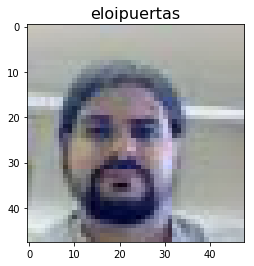

In [15]:
import urllib
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt

im = Image.open(urllib.request.urlopen(img_url))
plt.title(juser['screen_name'],size=16)
plt.imshow(im)

Now we want to retrieve the list of follower ids. There are two ways for doing so. Both uses the `api.followers_ids` function. The function returns a maximum of 100 ids. If we want to get all of them we may use a pagination variable `cursor`. This can be managed directly in the call `api.followers_ids(id, cursor)` or using a `Cursor` object with the `pages` method that handles the cursor implicitly. This second method is illustrated in the following lines:

In [16]:
import time
#Retrieving all the followers
ids = []
for page in tweepy.Cursor(api.followers_ids, screen_name=USER_NAME).pages():
    print("************** ***************")
    ids.extend(page)
    time.sleep(5)  #This should be 60 to avoid limit rates
ids

************** ***************


[937592982,
 19435796,
 702214973792063489,
 1151306876530962432,
 454143009,
 2499737527,
 1146167902640451587,
 250769102,
 1426409264,
 373280522,
 1854982104,
 1088451553986396160,
 1596301758,
 1097547167663865857,
 1121041578464821248,
 925017326176661504,
 1102567157437747200,
 2776776884,
 1040524261402796033,
 724975951831027713,
 242945949,
 8688832,
 1093596506924507138,
 9959322,
 3253200778,
 1047121682421485568,
 136267057,
 18176643,
 1059437056001236992,
 1036668815801761795,
 987734660267565056,
 796151990,
 29167187,
 996832631693209600,
 223103221,
 268254897,
 14235803,
 846285859,
 294101019,
 324312002,
 242013031,
 960983420993228801,
 394179048,
 954862755072430080,
 986543125341536257,
 285779081,
 1004847776449073152,
 10284202,
 124246207,
 965349922508767233,
 911633205027065859,
 2951142813,
 993985444663758848,
 156617316,
 800830869904756745,
 93046529,
 402857468,
 450549446,
 2487758371,
 481223244,
 64643723,
 58264226,
 2869033083,
 254501323,
 847221

Notice the `sleep` command. This is needed to respect the hourly limit rates of the Twitter API. 

In [18]:
document={}
document['user'] = user.id
document['followers'] = ids[:]

# Create the connection to MongoDB in local
try:
    conn=pymongo.MongoClient()
    print ("Connection to Mongo Daemon successful!!!")
except pymongo.errors.ConnectionFailure as e:
    print ("Could not connect to MongoDB: %s" % e) 
db = conn['twitter']
collection = db['twitter_users']
collection.insert_one(document)

Connection to Mongo Daemon successful!!!


In [19]:
for doc in collection.find():
    print (doc)

{'_id': ObjectId('5d8de4aaf8125b02e0c915d7'), 'user': 484683149, 'followers': [937592982, 19435796, 702214973792063489, 1151306876530962432, 454143009, 2499737527, 1146167902640451587, 250769102, 1426409264, 373280522, 1854982104, 1088451553986396160, 1596301758, 1097547167663865857, 1121041578464821248, 925017326176661504, 1102567157437747200, 2776776884, 1040524261402796033, 724975951831027713, 242945949, 8688832, 1093596506924507138, 9959322, 3253200778, 1047121682421485568, 136267057, 18176643, 1059437056001236992, 1036668815801761795, 987734660267565056, 796151990, 29167187, 996832631693209600, 223103221, 268254897, 14235803, 846285859, 294101019, 324312002, 242013031, 960983420993228801, 394179048, 954862755072430080, 986543125341536257, 285779081, 1004847776449073152, 10284202, 124246207, 965349922508767233, 911633205027065859, 2951142813, 993985444663758848, 156617316, 800830869904756745, 93046529, 402857468, 450549446, 2487758371, 481223244, 64643723, 58264226, 2869033083, 254

In [20]:
doc['user']

484683149

In [21]:
doc['followers']

[937592982,
 19435796,
 702214973792063489,
 1151306876530962432,
 454143009,
 2499737527,
 1146167902640451587,
 250769102,
 1426409264,
 373280522,
 1854982104,
 1088451553986396160,
 1596301758,
 1097547167663865857,
 1121041578464821248,
 925017326176661504,
 1102567157437747200,
 2776776884,
 1040524261402796033,
 724975951831027713,
 242945949,
 8688832,
 1093596506924507138,
 9959322,
 3253200778,
 1047121682421485568,
 136267057,
 18176643,
 1059437056001236992,
 1036668815801761795,
 987734660267565056,
 796151990,
 29167187,
 996832631693209600,
 223103221,
 268254897,
 14235803,
 846285859,
 294101019,
 324312002,
 242013031,
 960983420993228801,
 394179048,
 954862755072430080,
 986543125341536257,
 285779081,
 1004847776449073152,
 10284202,
 124246207,
 965349922508767233,
 911633205027065859,
 2951142813,
 993985444663758848,
 156617316,
 800830869904756745,
 93046529,
 402857468,
 450549446,
 2487758371,
 481223244,
 64643723,
 58264226,
 2869033083,
 254501323,
 847221

<div class = "alert alert-error" style = "border-radius:10px;border-width:3px;border-color:darkred;font-family:Verdana,sans-serif;font-size:16px;"> **EXERCISE:** Given a starting user ID, retrieve the user name, the date of the accoount creation and the last twit text and date corresponding to the whole set of followers. Store it to Database
</div>

### Sreaming API

The **Streaming API** works by making a request for a specific type of data — filtered by keyword, user, geographic area, or a random sample — and then keeping the connection open as long as there are no errors in the connection. The data you get back will be encoded in JSON. 

One of the main usage cases of tweepy is monitoring for tweets and doing actions when some event happens. Key component of that is the StreamListener object, which monitors tweets in real time and catches them.

If we check the official twitter streaming API we see that we have several modifiers for filtering the stream, i.e. track (filter by keyword), locations (filter by geographic location), etc

StreamListener has several methods, with on_data() and on_status() being the most useful ones. Here is a sample program which implements this behavior:

In [22]:
from tweepy import Stream,StreamListener

class listener(StreamListener):
    
    def __init__(self):
        super(StreamListener, self).__init__()
        self.num_tweets = 0
    def on_data(self, data):
        #Beauty print data
        if self.num_tweets < 5:
            parsed = json.loads(data)
            print (json.dumps(parsed, indent=4, sort_keys=True))
            self.num_tweets += 1
            return True
        else:
            return False

    def on_error(self, status):
        print (status)
        
        
        


1. Get the twitter data filtered by location inside the following bounding box. (http://boundingbox.klokantech.com) (get CSV)


[2.0878744125,41.465321939,2.0950841904,41.4704350021]

In [23]:
twitterStream = Stream(auth, listener()) 
twitterStream.filter(locations=[2.067704,41.465322,2.095084,41.478474])
print ("done")

{
    "contributors": null,
    "coordinates": null,
    "created_at": "Fri Sep 27 10:30:47 +0000 2019",
    "display_text_range": [
        7,
        106
    ],
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [],
        "user_mentions": [
            {
                "id": 469313664,
                "id_str": "469313664",
                "indices": [
                    0,
                    6
                ],
                "name": "Sergi Mu\u00f1iz Carrera",
                "screen_name": "s_mc_"
            }
        ]
    },
    "favorite_count": 0,
    "favorited": false,
    "filter_level": "low",
    "geo": null,
    "id": 1177531022289899520,
    "id_str": "1177531022289899520",
    "in_reply_to_screen_name": "s_mc_",
    "in_reply_to_status_id": 1177510944957595649,
    "in_reply_to_status_id_str": "1177510944957595649",
    "in_reply_to_user_id": 469313664,
    "in_reply_to_user_id_str": "469313664",
    "is_quote_status": false,
    "

{
    "contributors": null,
    "coordinates": null,
    "created_at": "Fri Sep 27 10:31:13 +0000 2019",
    "display_text_range": [
        33,
        140
    ],
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [
            {
                "display_url": "twitter.com/i/web/status/1\u2026",
                "expanded_url": "https://twitter.com/i/web/status/1177531129517268994",
                "indices": [
                    121,
                    144
                ],
                "url": "https://t.co/kawLddT5v8"
            }
        ],
        "user_mentions": [
            {
                "id": 163991506,
                "id_str": "163991506",
                "indices": [
                    0,
                    16
                ],
                "name": "James Cookson",
                "screen_name": "james_m_cookson"
            },
            {
                "id": 236850119,
                "id_str": "236850119",
               

{
    "contributors": null,
    "coordinates": {
        "coordinates": [
            2.1683,
            41.3894
        ],
        "type": "Point"
    },
    "created_at": "Fri Sep 27 10:31:23 +0000 2019",
    "entities": {
        "hashtags": [
            {
                "indices": [
                    42,
                    48
                ],
                "text": "SEB19"
            }
        ],
        "symbols": [],
        "urls": [
            {
                "display_url": "instagram.com/p/B26VCIJC9hG/\u2026",
                "expanded_url": "https://www.instagram.com/p/B26VCIJC9hG/?igshid=1cjnjo19076rd",
                "indices": [
                    72,
                    95
                ],
                "url": "https://t.co/OeOthocUX5"
            }
        ],
        "user_mentions": [
            {
                "id": 436683103,
                "id_str": "436683103",
                "indices": [
                    11,
                    27
       

In [24]:
from tweepy import Stream,StreamListener

class listener(StreamListener):
    def __init__(self):
        super(StreamListener, self).__init__()
        self.num_tweets = 0
        
    def on_data(self, status):
        if self.num_tweets < 5:
            json_data=json.loads(status)
            print (str('** '+json_data["user"]["screen_name"])+' ** : ' + json_data["text"])
            self.num_tweets += 1
            return True
        else:
            return False
        
    def on_error(self, status):
        print (status)
        
# Catch all tweets in Barcelona area and print them
twitterStream = Stream(auth, listener()) 
twitterStream.filter(locations=[2.0504377635,41.2787636541,2.3045074059,41.4725622346])
print ("done")

** fomenti ** : El precio de la #vivienda en #Barcelona cae por primera vez desde el 2013 https://t.co/1URj0lYB2m #RealEstate #Catalonia #Spain
** iMerrimantech ** : Going to go to the Apple store soon for the last time in Barcelona 😔 @NikiasMolina
** sanandoalmas ** : EL REIKI UNITARIO ES LO QUE UNE, NO LO QUE DIVIDE

Muchas personas buscan toda clase de gurúes susceptibles de ofre… https://t.co/3mEORpucYY
** soulehoward1 ** : This meeting will clearly be my ESMO highlight! Thanks for the precious time and great conversation. Hopefully… https://t.co/vHNzXXhteZ
** andymstark ** : @LeeBinding https://t.co/mcf5JATq86
done


Let us fill the class in order to capture and store the data in a MongoDB database.

In [30]:
from tweepy import Stream,StreamListener

class listener(StreamListener):
    def __init__(self):
        super(StreamListener, self).__init__()
        self.num_tweets = 0
        try:
            #use your database name, user and password here:
            #mongodb://<dbuser>:<dbpassword>@<mlab_url>/<database_name>
            with open("credentials.txt", 'r', encoding='utf-8') as f:
                [name,password,url]=f.read().splitlines()
                self.conn=pymongo.MongoClient("mongodb+srv://{}:{}@{}".format(name,password,url,))
            print ("Connected successfully!!!")
        except pymongo.errors.ConnectionFailure as e:
            print ("Could not connect to MongoDB: %s" % e) 
        self.db = self.conn['API']
        self.collection = db['tweets']
    
    def on_data(self, status):
        if self.num_tweets < 5:
            jdata = json.loads(status)
            if 'android' in jdata["source"]:
                device = "android"
            else:
                device = "apple"
            document={'text':jdata["text"], 'created':jdata["created_at"], 'screen_name':jdata["user"]["screen_name"], 'device':device}        
            self.collection.insert_one(document) 
            print (document)
            self.num_tweets += 1
            return True
        else:
            return False
    
    def on_error(self, status):
        print (status)

# Catch all tweets in Barcelona area and print them
twitterStream = Stream(auth, listener()) 
twitterStream.filter(locations=[2.0504377635,41.2787636541,2.3045074059,41.4725622346])
print ("done")

Connected successfully!!!
{'text': 'Participación tambien de Guillermo Trejo de @KelloggInst que nos habla de las múltiples violencias: "Mexico está en… https://t.co/EQLLd0OrCp', 'created': 'Fri Sep 27 10:37:00 +0000 2019', 'screen_name': 'ICIPeace', 'device': 'android', '_id': ObjectId('5d8de651f8125b02e0c915e3')}
{'text': 'Els socialistes de #SantCugat i #Valldoreix ens sumem a la #VagaMundialPelClima #EmergenciaClimatica27S 👇🏻🌍', 'created': 'Fri Sep 27 10:37:07 +0000 2019', 'screen_name': 'Cugat_Psc', 'device': 'apple', '_id': ObjectId('5d8de658f8125b02e0c915e4')}
{'text': '🙈🙈', 'created': 'Fri Sep 27 10:37:10 +0000 2019', 'screen_name': 'jordi_GT', 'device': 'apple', '_id': ObjectId('5d8de65bf8125b02e0c915e5')}
{'text': "@siraesca És indignant!!!!\nLa premsa/TV és pensen fer l'agost empastifant-ho tot amb mentides.\nS'ha de denunciar.\nIntolerable i vergonyós!", 'created': 'Fri Sep 27 10:37:12 +0000 2019', 'screen_name': 'MontserratFig18', 'device': 'android', '_id': ObjectId('5d8d

In [31]:
#Check captured data https://cloud.mongodb.com

try:
    #use your database name, user and password here:
    #mongodb://<dbuser>:<dbpassword>@<mlab_url>/<database_name>
    with open("credentials.txt", 'r', encoding='utf-8') as f:
                [name,password,url]=f.read().splitlines()
                conn=pymongo.MongoClient("mongodb+srv://{}:{}@{}".format(name,password,url))
    print ("Connected successfully!!!")
except pymongo.errors.ConnectionFailure as e:
        print ("Could not connect to MongoDB: %s" % e) 

db = conn["API"]
collection = db['tweets']
print (collection.count_documents({}))
for doc in collection.find():
    print (str('** '+doc["screen_name"])+' ** : ' + doc["text"])


Connected successfully!!!
5
** ICIPeace ** : Participación tambien de Guillermo Trejo de @KelloggInst que nos habla de las múltiples violencias: "Mexico está en… https://t.co/EQLLd0OrCp
** Cugat_Psc ** : Els socialistes de #SantCugat i #Valldoreix ens sumem a la #VagaMundialPelClima #EmergenciaClimatica27S 👇🏻🌍
** jordi_GT ** : 🙈🙈
** MontserratFig18 ** : @siraesca És indignant!!!!
La premsa/TV és pensen fer l'agost empastifant-ho tot amb mentides.
S'ha de denunciar.
Intolerable i vergonyós!
** capodicampos ** : @elmeropensador ✌️✌️✌️✌️✌️✌️✌️✌️✌️✌️✌️✌️✌️✌️✌️✌️✌️✌️✌️👍👍👍👍👍👍👍👍👍👍👍👍👏👏👏👏👏👏👏👏👏😘😘😘😘😘😘😘😘🤔🤗


<div class = "alert alert-error" style = "border-radius:10px;border-width:3px;border-color:darkred;font-family:Verdana,sans-serif;font-size:16px;"> **EXERCISE:** Filter up to 5 twits with hashtag bigdata and location inside Barcelona province 
</div>

APIs are nice. Most large web site provide useful APIs, e.g. Google, OpenStreetMap, Facebook, etc, subject to some use terms. However most of the web sited do not provide any kind of access to data. What to do then?